In [1]:
import torch
import torchvision 
from torchvision.models import list_models
import torch.nn as nn 
import torch.nn.functional as F 
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import torchvision.models as models
from torchvision.models import get_model_weight

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score , precision_score 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

import os 
import math
import shutil 
import soundfile
import scipy.signal
from scipy.io import wavfile

import imageio
import librosa 
import librosa.display
from IPython.display import Audio
from tqdm import tqdm

## Model 1: ConvNext

In [2]:
torch.cuda.is_available()

False

In [3]:
all_models = list_models()
for model in all_models: 
    print (model)

print (type(all_models))
print (type(list_models()))
print(len(all_models))

alexnet
convnext_base
convnext_large
convnext_small
convnext_tiny
deeplabv3_mobilenet_v3_large
deeplabv3_resnet101
deeplabv3_resnet50
densenet121
densenet161
densenet169
densenet201
efficientnet_b0
efficientnet_b1
efficientnet_b2
efficientnet_b3
efficientnet_b4
efficientnet_b5
efficientnet_b6
efficientnet_b7
efficientnet_v2_l
efficientnet_v2_m
efficientnet_v2_s
fasterrcnn_mobilenet_v3_large_320_fpn
fasterrcnn_mobilenet_v3_large_fpn
fasterrcnn_resnet50_fpn
fasterrcnn_resnet50_fpn_v2
fcn_resnet101
fcn_resnet50
fcos_resnet50_fpn
googlenet
inception_v3
keypointrcnn_resnet50_fpn
lraspp_mobilenet_v3_large
maskrcnn_resnet50_fpn
maskrcnn_resnet50_fpn_v2
maxvit_t
mc3_18
mnasnet0_5
mnasnet0_75
mnasnet1_0
mnasnet1_3
mobilenet_v2
mobilenet_v3_large
mobilenet_v3_small
mvit_v1_b
mvit_v2_s
quantized_googlenet
quantized_inception_v3
quantized_mobilenet_v2
quantized_mobilenet_v3_large
quantized_resnet18
quantized_resnet50
quantized_resnext101_32x8d
quantized_resnext101_64x4d
quantized_shufflenet_v2_x0_

In [4]:
### Classification Models: 
classification_models = list_models(module = torchvision.models)
for class_m in classification_models: 
    print(class_m)

print(len(classification_models))

alexnet
convnext_base
convnext_large
convnext_small
convnext_tiny
densenet121
densenet161
densenet169
densenet201
efficientnet_b0
efficientnet_b1
efficientnet_b2
efficientnet_b3
efficientnet_b4
efficientnet_b5
efficientnet_b6
efficientnet_b7
efficientnet_v2_l
efficientnet_v2_m
efficientnet_v2_s
googlenet
inception_v3
maxvit_t
mnasnet0_5
mnasnet0_75
mnasnet1_0
mnasnet1_3
mobilenet_v2
mobilenet_v3_large
mobilenet_v3_small
regnet_x_16gf
regnet_x_1_6gf
regnet_x_32gf
regnet_x_3_2gf
regnet_x_400mf
regnet_x_800mf
regnet_x_8gf
regnet_y_128gf
regnet_y_16gf
regnet_y_1_6gf
regnet_y_32gf
regnet_y_3_2gf
regnet_y_400mf
regnet_y_800mf
regnet_y_8gf
resnet101
resnet152
resnet18
resnet34
resnet50
resnext101_32x8d
resnext101_64x4d
resnext50_32x4d
shufflenet_v2_x0_5
shufflenet_v2_x1_0
shufflenet_v2_x1_5
shufflenet_v2_x2_0
squeezenet1_0
squeezenet1_1
swin_b
swin_s
swin_t
swin_v2_b
swin_v2_s
swin_v2_t
vgg11
vgg11_bn
vgg13
vgg13_bn
vgg16
vgg16_bn
vgg19
vgg19_bn
vit_b_16
vit_b_32
vit_h_14
vit_l_16
vit_l_32
wi

# TASK1 : Converting Audio Data into Mel Spectrogrms (In Batches)

### Trying out an audio file and see if it loads correctly

In [5]:
audio_vec, sr = librosa.load(r'C:\Users\NUhunsere\fine_tuning_project\My_Data\Audio\4\4_george_21.wav')

In [6]:
print (audio_vec)
print (len(audio_vec))
print(sr)

[-0.00391517 -0.00404376 -0.00306127 ... -0.00799979 -0.00546798
 -0.00224598]
8280
22050


## Loading the audio files and converting them into Mel Spectrograms

In [7]:
src_dir = r'C:\Users\NUhunsere\fine_tuning_project\My_Data\Audio'
des_dir = r'C:\Users\NUhunsere\fine_tuning_project\My_Data\Mel_Specs'

In [8]:
##1 : Looping Over the subdirectories:
for num in range (10): 
    src_subdir = os.path.join (src_dir, str(num))  ### constructing a  path
    dest_subdir = os.path.join(des_dir, str(num))  ### constructing a path

    ### target_ sub_dir: 
    Mel_Specs = os.makedirs(dest_subdir, exist_ok = True)

    files = os.listdir(src_subdir)
    for file_name in tqdm(files, desc = f'Processing in Directory {num}'):
        src_file_path = os.path.join(src_subdir, file_name)
        target_file_path = os.path.join(dest_subdir, file_name.replace(".wav", ".png"))

        ### Converting the Audio to Mel Spectrograms: This is the part where things need to be played
        y, sr = librosa. load(src_file_path, sr = 160000)
        S = librosa.feature.melspectrogram (y=y, sr= sr,n_mels = 128)    
        log_S = librosa.power_to_db(S, ref=np.max)
        
        img = ((log_S - log_S.min()) / (log_S.max() - log_S.min()) * 255).astype(np.uint8)
        imageio.imwrite(target_file_path, img)

Processing in Directory 9: 100%|██████████| 300/300 [00:03<00:00, 83.01it/s]


## Model to be used :
1- I can use a variety of pre-trained models and fine-tune on the same task of handwritten digit classification
2- models_list () to see which ones you would want to use for classification.

In [9]:
class_models = list_models(module=torchvision.models)
for model in class_models: 
    print(model)

alexnet
convnext_base
convnext_large
convnext_small
convnext_tiny
densenet121
densenet161
densenet169
densenet201
efficientnet_b0
efficientnet_b1
efficientnet_b2
efficientnet_b3
efficientnet_b4
efficientnet_b5
efficientnet_b6
efficientnet_b7
efficientnet_v2_l
efficientnet_v2_m
efficientnet_v2_s
googlenet
inception_v3
maxvit_t
mnasnet0_5
mnasnet0_75
mnasnet1_0
mnasnet1_3
mobilenet_v2
mobilenet_v3_large
mobilenet_v3_small
regnet_x_16gf
regnet_x_1_6gf
regnet_x_32gf
regnet_x_3_2gf
regnet_x_400mf
regnet_x_800mf
regnet_x_8gf
regnet_y_128gf
regnet_y_16gf
regnet_y_1_6gf
regnet_y_32gf
regnet_y_3_2gf
regnet_y_400mf
regnet_y_800mf
regnet_y_8gf
resnet101
resnet152
resnet18
resnet34
resnet50
resnext101_32x8d
resnext101_64x4d
resnext50_32x4d
shufflenet_v2_x0_5
shufflenet_v2_x1_0
shufflenet_v2_x1_5
shufflenet_v2_x2_0
squeezenet1_0
squeezenet1_1
swin_b
swin_s
swin_t
swin_v2_b
swin_v2_s
swin_v2_t
vgg11
vgg11_bn
vgg13
vgg13_bn
vgg16
vgg16_bn
vgg19
vgg19_bn
vit_b_16
vit_b_32
vit_h_14
vit_l_16
vit_l_32
wi

In [10]:
from torchvision.models import convnext_base
from torchvision.models import get_model_weights

In [11]:
weights = get_model_weights("convnext_base").DEFAULT
print(weights)

ConvNeXt_Base_Weights.IMAGENET1K_V1


In [12]:
model = convnext_base(weights= weights)

In [13]:
print(type(model))

<class 'torchvision.models.convnext.ConvNeXt'>


In [14]:
print(model.state_dict())

OrderedDict({'features.0.0.weight': tensor([[[[-6.0098e-03, -6.8450e-03, -2.3322e-02, -1.4199e-02],
          [-2.0977e-02, -3.0879e-02, -1.5908e-02, -3.1299e-02],
          [-2.4302e-02, -3.2027e-02, -2.3828e-03, -1.6783e-02],
          [-3.2155e-02, -1.7724e-02, -1.5575e-02, -8.6983e-03]],

         [[ 3.1789e-02,  3.6679e-02,  1.5631e-02,  3.3829e-02],
          [ 2.4995e-02,  2.0497e-02,  5.0884e-02,  1.2866e-02],
          [ 4.8313e-02,  1.8921e-02,  5.3069e-02,  3.2642e-02],
          [ 3.8201e-02,  3.5913e-02,  2.1590e-02,  3.6775e-02]],

         [[-1.7640e-02, -7.1356e-03, -1.6077e-02, -1.1205e-02],
          [-3.0813e-02, -2.5447e-02, -9.8094e-03, -1.7723e-02],
          [-2.7059e-02, -1.4975e-02, -1.4762e-02, -1.5975e-02],
          [-1.4539e-02, -5.6139e-03, -4.9478e-03, -5.9251e-04]]],


        [[[-6.1712e-02, -9.2129e-02, -9.4422e-02,  3.7132e-02],
          [-6.8008e-02, -9.5423e-02, -6.3285e-02,  1.5261e-02],
          [ 4.6383e-02,  8.0093e-02,  5.1375e-02, -1.6512e-0

## Model Fine-Tuning

## in this part, we are going to replace the last layer of the model with only 10 classes. My molde1 is called the Convnext. It has been trained on the IMAGENET1K dataset. It has 1000 classes. The goal here is to replace the last layer with 10 classes for the handwritten digits. The task requires freezing the weights of the pre-trained model in addition to replacing the last layer

In [15]:
print(model)

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((128,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=128, out_features=512, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=512, out_features=128, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(

In [16]:
print(model.features)

Sequential(
  (0): Conv2dNormActivation(
    (0): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
    (1): LayerNorm2d((128,), eps=1e-06, elementwise_affine=True)
  )
  (1): Sequential(
    (0): CNBlock(
      (block): Sequential(
        (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
        (1): Permute()
        (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
        (3): Linear(in_features=128, out_features=512, bias=True)
        (4): GELU(approximate='none')
        (5): Linear(in_features=512, out_features=128, bias=True)
        (6): Permute()
      )
      (stochastic_depth): StochasticDepth(p=0.0, mode=row)
    )
    (1): CNBlock(
      (block): Sequential(
        (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
        (1): Permute()
        (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
        (3): Linear(in_features=128, out_features=512, bias=True)
        (4): GELU(approx

In [17]:
for p in model.parameters(): 
    print(p.shape)

torch.Size([128, 3, 4, 4])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([128, 1, 1])
torch.Size([128, 1, 7, 7])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([512, 128])
torch.Size([512])
torch.Size([128, 512])
torch.Size([128])
torch.Size([128, 1, 1])
torch.Size([128, 1, 7, 7])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([512, 128])
torch.Size([512])
torch.Size([128, 512])
torch.Size([128])
torch.Size([128, 1, 1])
torch.Size([128, 1, 7, 7])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([512, 128])
torch.Size([512])
torch.Size([128, 512])
torch.Size([128])
torch.Size([128])
torch.Size([128])
torch.Size([256, 128, 2, 2])
torch.Size([256])
torch.Size([256, 1, 1])
torch.Size([256, 1, 7, 7])
torch.Size([256])
torch.Size([256])
torch.Size([256])
torch.Size([1024, 256])
torch.Size([1024])
torch.Size([256, 1024])
torch.Size([256])
torch.Size([256, 1, 1])
torch.Size([256, 1, 7, 7])
torch.Size([256])
torch.Size([256]

### This section is concerned with freezing the weights of the pre-trained model and replacing the last layer with 10 classes

In [18]:
##1 : Freezing the weights
for p in model.parameters(): 
    p.requires_grad= False

##2 : Replacing the last layer for the convnext 

num_classes = 10
num_in_features = model.classifier[2].in_features
model.classifier[2]= nn.Linear(num_in_features, num_classes)


##3 : Change the first layer of the model to handle only greayscale 1D Images
new_first_layer = nn.Conv2d(in_channels=1, 
                            out_channels=model.features[0][0].out_channels, 
                            kernel_size= model.features[0][0].kernel_size, 
                            stride = model.features[0][0].stride, 
                            padding=model.features[0][0].padding,
                            bias = model.features[0][0].bias is not None )

model.features[0][0]= new_first_layer
print(model)

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(1, 128, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((128,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=128, out_features=512, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=512, out_features=128, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(

## Data Preprocessing
### Use the following pre-processing of the Mel Spectrograms for now to get pre-liminary results. Research other techniques later.

In [19]:
my_dir = r'My_Data\Mel_Specs'
print (my_dir)

My_Data\Mel_Specs


In [20]:
## The transformation of the image: 
preprocess = transforms.Compose([
    transforms.Resize((224,224)),   ### size of the image
    transforms.Grayscale(), 
    transforms.ToTensor(),
    transforms.Lambda(lambda x : x.clamp(0,1))])

In [21]:
### Loading the Image Dataset
## The ImageFolder takes in the dataset directory and the transforms as parameters
my_dataset  = ImageFolder(my_dir, transform=preprocess)
print(type(my_dataset))

<class 'torchvision.datasets.folder.ImageFolder'>


In [22]:
x= int(len(my_dataset)* 0.85)
y= len(my_dataset)-x

print (x)
print(y)

2550
450


In [23]:
train_dataset, test_dataset = random_split( my_dataset, [x,y])
print(len(train_dataset))
print(len(test_dataset))

2550
450


In [24]:
### Loading the dataset
train_loader = DataLoader(train_dataset, batch_size=32, shuffle= True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle= True)


In [25]:
for i, j in train_loader: 
    print(i.shape,j.shape)

### The following are the shape of my images: 32 batches *1greyscale*16H*128 W 

torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([32, 1, 224, 224]) torch.Size([32])
torch.Size([3

In [26]:
for i, j in train_loader: 
    print(i,j)
## The follwing my greyscale image tensors

tensor([[[[0.5961, 0.5843, 0.5686,  ..., 0.6510, 0.6392, 0.6353],
          [0.6431, 0.6314, 0.6157,  ..., 0.6980, 0.6863, 0.6824],
          [0.7176, 0.7059, 0.6902,  ..., 0.7725, 0.7608, 0.7569],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.5922, 0.6118, 0.6431,  ..., 0.6196, 0.6078, 0.6000],
          [0.6392, 0.6588, 0.6902,  ..., 0.6667, 0.6549, 0.6471],
          [0.7137, 0.7333, 0.7647,  ..., 0.7451, 0.7333, 0.7255],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]],


        [[[0.4118, 0.4196, 0.4314,  ..., 0.2392, 0.2667, 0.2824],
          [0.4588, 0.4667, 0.4784,  ..., 0.2863, 0.3137, 0.3294],
          [0.5373, 0.5451, 0.5569,  ..

In [27]:
## what is my devoce? cpu for sure : 
device = torch.device ("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(1, 128, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((128,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=128, out_features=512, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=512, out_features=128, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(

## Come back to the model parameters later and play with them a bit more. Understand more what works better and why 08/07/2024

In [28]:
### Model Parameters: 
batch_size = 32
num_epochs = 300
image_size = (224, 224)
learning_rate = 0.001
use_scheduler = True


display_graphs_bool = True
acc_min_y = 0.8 
loss_max_y = 2
loss_min_y = 1
major_tick_spacing = 20
display_graphs_zoomed_bool = False
interval = 100
debug = False

In [29]:
loss_function = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
optimizer.zero_grad()
steps = len(train_loader) 
print(steps)

80


## Saving the Checkpoints

In [30]:
### Use this as two helper functions for saving the model checkpoints and the model entirely

checkpoint_dir = "Model1_Checkpoints"
model_name = "convmodel"

os.makedirs(checkpoint_dir, exist_ok=True)

def save_checkpoint(epoch, model, optimizer, loss, val_loss, accuracy, val_accuracy):
    checkpoint_path = os.path.join(checkpoint_dir, f'{model_name}_epoch_{epoch+1}_loss_{loss:.4f}_vloss{val_loss:.4f}_acc_{accuracy:.4f}_vacc{val_accuracy:.4f}.pt')
    checkpoint = {
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': loss
    }
    torch.save(checkpoint, checkpoint_path)

def save_model(epoch, model, optimizer, loss, val_loss, accuracy, val_accuracy):
    path = os.path.join(checkpoint_dir, f'{model_name}_epoch_{epoch+1}_loss_{loss:.4f}_vloss{val_loss:.4f}_acc_{accuracy:.4f}_vacc{val_accuracy:.4f}.pt')
    torch.save(model, path)

In [31]:
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [32]:
if use_scheduler:
    scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.9)

In [33]:
# Lists to store accuracy values for each epoch
metrics_train_accuracy = []
metrics_val_accuracy = []
metrics_train_loss = []
metrics_val_loss = []
metrics_epoch = []

def display_graphs(epoch, accuracy, val_accuracy, loss, val_loss, csv_dir):
    if isinstance(loss, torch.Tensor):
        loss = loss.cpu()

    loss = loss.detach().numpy()

    metrics_epoch.append(epoch+1)
    metrics_train_accuracy.append(accuracy)
    metrics_val_accuracy.append(val_accuracy)
    metrics_train_loss.append(loss)
    metrics_val_loss.append(val_loss)

    if (epoch+1) % interval == 0 or (epoch-1) == num_epochs:
        if epoch != 0:
            fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # Create a figure with two subplots
            axs[0].plot(metrics_epoch, metrics_train_accuracy, label='Training Accuracy', marker='o', markersize=4, color='#32a852')
            axs[0].plot(metrics_epoch, metrics_val_accuracy, label='Validation Accuracy', marker='o', markersize=4, color='#312af7')
            axs[0].set_xlabel('Epoch')
            axs[0].set_ylabel('Accuracy')
            axs[0].set_title('Training and Validation Accuracy')
            axs[0].set_ylim(acc_min_y, 1)
            axs[0].set_xlim(1, num_epochs)
            axs[0].legend()
            major_ticks = np.arange(0, num_epochs + 1, major_tick_spacing)
            minor_ticks = np.arange(0, num_epochs + 1, 1)
            axs[0].set_xticks(major_ticks)
            axs[0].set_xticks(minor_ticks, minor=True)
            axs[0].set_xticklabels(major_ticks.astype(int))
            axs[0].grid(True, which='both', linestyle='--', alpha=0.5)

            # Plot the loss graph in the second subplot
            axs[1].plot(metrics_epoch, metrics_train_loss, label='Training Loss', marker='o', markersize=4, color='#32a852')
            axs[1].plot(metrics_epoch, metrics_val_loss, label='Validation Loss', marker='o', markersize=4, color='#312af7')
            axs[1].set_xlabel('Epoch')
            axs[1].set_ylabel('Loss')
            axs[1].set_title('Training and Validation Loss')
            axs[1].set_ylim(loss_min_y, loss_max_y)
            axs[1].set_xlim(1, num_epochs)
            axs[1].legend()
            major_ticks = np.arange(0, num_epochs + 1, major_tick_spacing)
            minor_ticks = np.arange(0, num_epochs + 1, 1)
            axs[1].set_xticks(major_ticks)
            axs[1].set_xticks(minor_ticks, minor=True)
            axs[1].set_xticklabels(major_ticks.astype(int))
            axs[1].grid(True, which='both', linestyle='--', alpha=0.5)

            plt.tight_layout()
            plt.show()

            # Create a dictionary with your data
            data = {
                'Epoch': metrics_epoch,
                'Train Accuracy': metrics_train_accuracy,
                'Validation Accuracy': metrics_val_accuracy,
                'Train Loss': metrics_train_loss,
                'Validation Loss': metrics_val_loss
            }

            # Create a pandas DataFrame from your dictionary
            df = pd.DataFrame(data)
            # Save DataFrame to csv
            file_path = os.path.join(csv_dir, 'metrics.csv')
            df.to_csv(file_path, index=False)

In [34]:
# Lists to store accuracy values for each epoch
metrics_train_accuracy = []
metrics_val_accuracy = []
metrics_train_loss = []
metrics_val_loss = []
metrics_epoch = []

def display_graphs_zoomed(epoch, accuracy, val_accuracy, loss, val_loss):
    if isinstance(loss, torch.Tensor):
        loss = loss.cpu()

    loss = loss.detach().numpy()

    metrics_epoch.append(epoch+1)
    metrics_train_accuracy.append(accuracy)
    metrics_val_accuracy.append(val_accuracy)
    metrics_train_loss.append(loss)
    metrics_val_loss.append(val_loss)

    # calc y limit for accuracy
    if accuracy < val_accuracy:
        acc_y_lim = accuracy
    else:
        acc_y_lim = val_accuracy
    acc_y_lim = acc_y_lim - (acc_y_lim * 0.5)
    # TypeError: can't multiply sequence by non-int of type 'float'

    acc_y_lim = math.floor(acc_y_lim * 10) / 10

    # calc y limit for loss
    if loss > val_loss:
        val_y_lim = loss
    else:
        val_y_lim = val_loss

    if (epoch+1) % interval == 0 or (epoch-1) == num_epochs:
        if epoch != 0:
            fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # Create a figure with two subplots
            # Plot the accuracy graph in the first subplot
            axs[0].plot(metrics_epoch, metrics_train_accuracy, label='Training Accuracy', marker='o', markersize=4, color='#32a852')
            axs[0].plot(metrics_epoch, metrics_val_accuracy, label='Validation Accuracy', marker='o', markersize=4, color='#312af7')
            axs[0].set_xlabel('Epoch')
            axs[0].set_ylabel('Accuracy')
            axs[0].set_title('Training and Validation Accuracy')
            axs[0].set_ylim(acc_y_lim, 1)
            axs[0].set_xlim(1, num_epochs)
            axs[0].grid(True, linestyle='--', alpha=0.5)
            axs[0].legend()
            major_ticks = np.arange(0, num_epochs + 1, major_tick_spacing)
            minor_ticks = np.arange(0, num_epochs + 1, 1)
            axs[1].set_xticks(major_ticks)
            axs[1].set_xticks(minor_ticks, minor=True)
            axs[1].set_xticklabels(major_ticks.astype(int))
            axs[1].grid(True, which='both', linestyle='--', alpha=0.5)

            # Plot the loss graph in the second subplot
            axs[1].plot(metrics_epoch, metrics_train_loss, label='Training Loss', marker='o', markersize=4, color='#32a852')
            axs[1].plot(metrics_epoch, metrics_val_loss, label='Validation Loss', marker='o', markersize=4, color='#312af7')
            axs[1].set_xlabel('Epoch')
            axs[1].set_ylabel('Loss')
            axs[1].set_title('Training and Validation Loss')
            axs[1].set_ylim(0, val_y_lim)
            axs[1].set_xlim(1, num_epochs)
            axs[1].set_xticks(range(1, num_epochs + 1, major_tick_spacing))
            axs[1].grid(True, linestyle='--', alpha=0.5)
            axs[1].legend()
            major_ticks = np.arange(0, num_epochs + 1, 5)
            minor_ticks = np.arange(0, num_epochs + 1, 1)
            axs[1].set_xticks(major_ticks)
            axs[1].set_xticks(minor_ticks, minor=True)
            axs[1].set_xticklabels(major_ticks.astype(int))
            axs[1].grid(True, which='both', linestyle='--', alpha=0.5)

            plt.tight_layout()
            plt.show()

            # Create a dictionary with your data
            data = {
                'Epoch': metrics_epoch,
                'Train Accuracy': metrics_train_accuracy,
                'Validation Accuracy': metrics_val_accuracy,
                'Train Loss': metrics_train_loss,
                'Validation Loss': metrics_val_loss
            }

            # Create a pandas DataFrame from your dictionary
            df = pd.DataFrame(data)
            # Save DataFrame to csv
            file_path = os.path.join(csv_dir, 'metrics.csv')
            df.to_csv(file_path, index=False)

In [35]:
display_progress_bar = False
print("Beginning training...")

for epoch in range(num_epochs): 
    if display_progress_bar: 
        Progress_bar = tqdm(train_loader, total= steps, leave= True)
    else: 
        progress_bar = train_loader
    total_correct = 0
    total_samples = 0

    for i, (inputs, labels) in enumerate(progress_bar):
        inputs = inputs.to(device)
        labels = labels.to(device)
        predictions = model(inputs)
        if debug == True:
            print('*** DEBUG ***')
            print('Predictions: ', predictions.shape)
            print('Labels: ', labels.shape)
            print('Inputs: ', inputs.shape)
            print()
  
        loss = loss_function(predictions, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()



        _, predicted_labels = torch.max(predictions, 1)
        total_correct += (predicted_labels == labels).sum().item()
        total_samples += labels.size(0)

        if display_progress_bar:
            progress_bar.set_description(f"Epoch [{epoch+1}/{num_epochs}]")
            progress_bar.set_postfix(loss=loss.item())


        model.eval()
        with torch.no_grad():
            val_loss = 0
            val_correct = 0
            val_samples = 0

            for inputs, labels in test_loader:
                inputs = inputs.to(device)
                labels = labels.to(device)


                predictions = model(inputs)
                loss = loss_function(predictions, labels)


                _, predicted_labels = torch.max(predictions, 1)
                val_correct += (predicted_labels == labels).sum().item()
                val_samples += labels.size(0)
                val_loss += loss.item()


                val_loss /= len(test_loader)
                val_accuracy = val_correct / val_samples
                accuracy = total_correct / total_samples


            if use_scheduler:
                scheduler.step()

            print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}, Acc: {accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

    if display_graphs_bool == True:
        display_graphs(epoch, accuracy, val_accuracy, loss, val_loss, checkpoint_dir)
    if display_graphs_zoomed_bool == True:
        display_graphs_zoomed(epoch, accuracy, val_accuracy, loss, val_loss, checkpoint_dir)



    save_checkpoint(epoch, model, optimizer, loss, val_loss, accuracy, val_accuracy)
    save_model(epoch, model, optimizer, loss, val_loss, accuracy, val_accuracy)

    model.train()

Beginning training...
Epoch [1/300], Loss: 2.5121, Acc: 0.1250, Val Loss: 0.1784, Val Acc: 0.0956
Epoch [1/300], Loss: 2.3620, Acc: 0.1094, Val Loss: 0.1688, Val Acc: 0.0956
Epoch [1/300], Loss: 2.3013, Acc: 0.0938, Val Loss: 0.1646, Val Acc: 0.0933
Epoch [1/300], Loss: 2.2641, Acc: 0.1094, Val Loss: 0.1620, Val Acc: 0.0933
Epoch [1/300], Loss: 2.2270, Acc: 0.1125, Val Loss: 0.1590, Val Acc: 0.0933
Epoch [1/300], Loss: 2.3108, Acc: 0.1146, Val Loss: 0.1650, Val Acc: 0.0933
Epoch [1/300], Loss: 2.4807, Acc: 0.1116, Val Loss: 0.1766, Val Acc: 0.1178
Epoch [1/300], Loss: 2.4943, Acc: 0.1133, Val Loss: 0.1771, Val Acc: 0.1089
Epoch [1/300], Loss: 2.2346, Acc: 0.1076, Val Loss: 0.1602, Val Acc: 0.1089
Epoch [1/300], Loss: 2.4093, Acc: 0.1062, Val Loss: 0.1714, Val Acc: 0.1133
Epoch [1/300], Loss: 2.5206, Acc: 0.1108, Val Loss: 0.1793, Val Acc: 0.1178
Epoch [1/300], Loss: 2.3791, Acc: 0.1094, Val Loss: 0.1699, Val Acc: 0.1022
Epoch [1/300], Loss: 2.0484, Acc: 0.1106, Val Loss: 0.1481, Val Ac

KeyboardInterrupt: 

## Test Model: 


In [38]:
path = r'C:\Users\NUhunsere\fine_tuning_project\Model1_Checkpoints\convmodel_epoch_34_loss_0.4333_vloss0.0335_acc_0.7090_vacc0.6733.pt'

model = torch.load(path)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
model.eval()

C:\Users\NUhunsere\AppData\Local\Temp\ipykernel_17412\3976487779.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(path)


ConvNeXt(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(1, 128, kernel_size=(4, 4), stride=(4, 4))
      (1): LayerNorm2d((128,), eps=1e-06, elementwise_affine=True)
    )
    (1): Sequential(
      (0): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(in_features=128, out_features=512, bias=True)
          (4): GELU(approximate='none')
          (5): Linear(in_features=512, out_features=128, bias=True)
          (6): Permute()
        )
        (stochastic_depth): StochasticDepth(p=0.0, mode=row)
      )
      (1): CNBlock(
        (block): Sequential(
          (0): Conv2d(128, 128, kernel_size=(7, 7), stride=(1, 1), padding=(3, 3), groups=128)
          (1): Permute()
          (2): LayerNorm((128,), eps=1e-06, elementwise_affine=True)
          (3): Linear(

In [39]:
from sklearn.metrics import classification_report

true_labels = []
pred_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs) 
        _, preds = torch.max(outputs, 1)

        true_labels.extend(labels.numpy().tolist())
        pred_labels.extend(preds.cpu().numpy().tolist())

report = classification_report(true_labels, pred_labels, output_dict=True)

print(f'Precision: {report["macro avg"]["precision"]}')
print(f'Recall: {report["macro avg"]["recall"]}')
print(f'F1 score: {report["macro avg"]["f1-score"]}')


Precision: 0.6740841195197822
Recall: 0.6708333919524763
F1 score: 0.6655554996659773


<Figure size 1000x800 with 0 Axes>

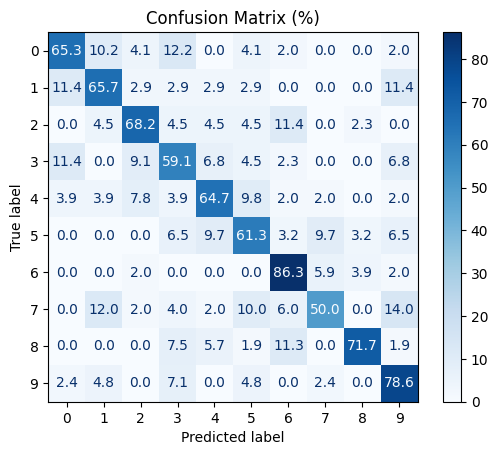

Precision: 0.6740841195197822
Recall: 0.6708333919524763
F1 score: 0.6655554996659773


In [41]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

true_labels = []
pred_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs) 
        _, preds = torch.max(outputs, 1)

        true_labels.extend(labels.numpy().tolist())
        pred_labels.extend(preds.cpu().numpy().tolist())

# Compute the confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Normalize the confusion matrix to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Create a ConfusionMatrixDisplay object with percentages
disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues, values_format='.1f')  # Format values to one decimal place
plt.title('Confusion Matrix (%)')

# If you know the class names, you can add them like this:
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_percentage, display_labels=['Class0', 'Class1', ...])

plt.show()

# Print classification report
report = classification_report(true_labels, pred_labels, output_dict=True)

print(f'Precision: {report["macro avg"]["precision"]}')
print(f'Recall: {report["macro avg"]["recall"]}')
print(f'F1 score: {report["macro avg"]["f1-score"]}')

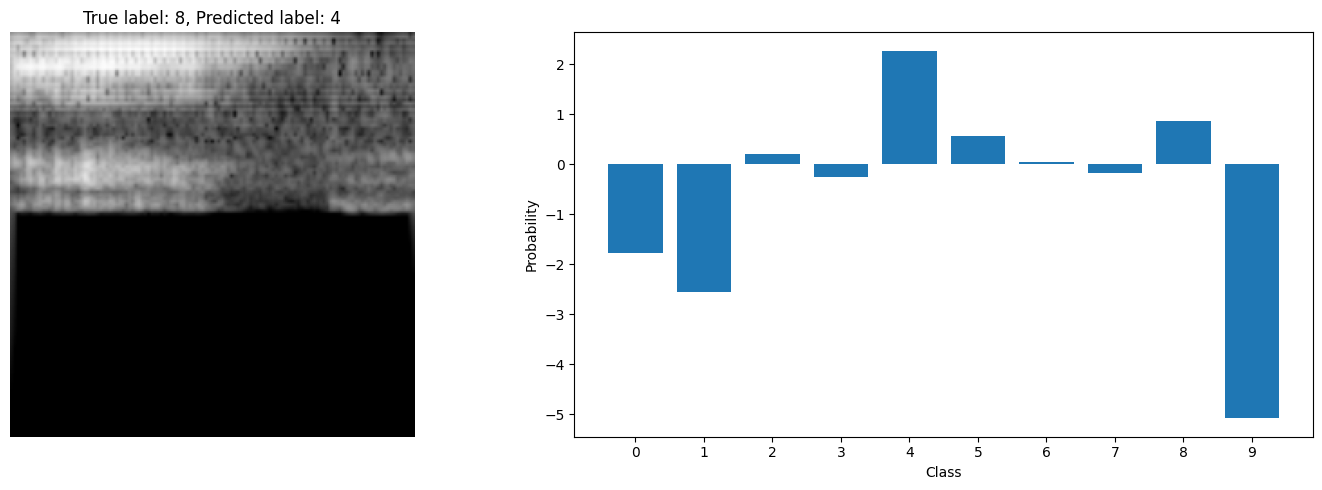

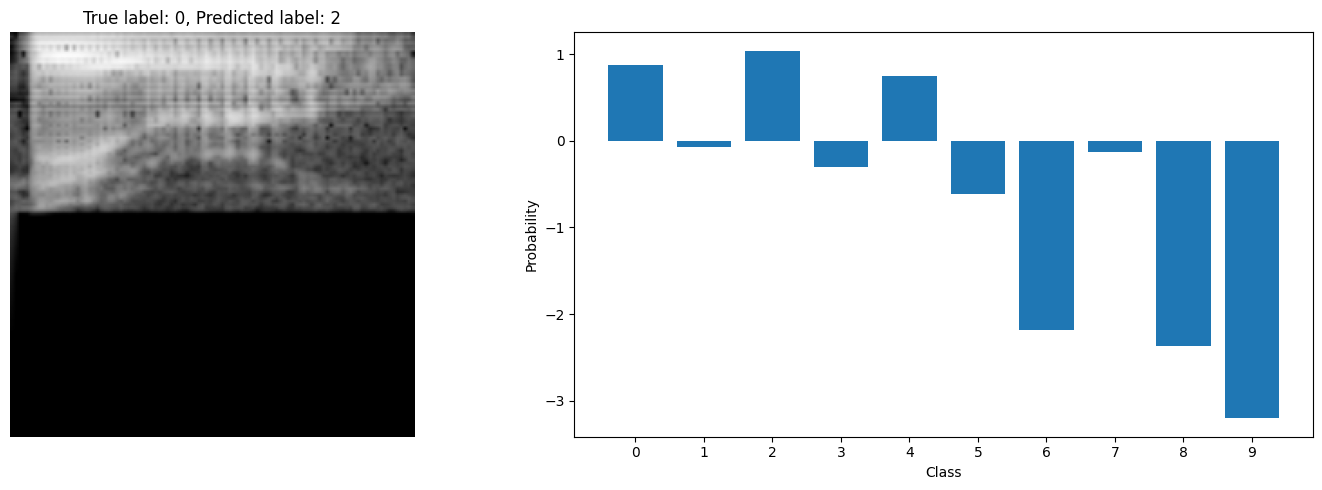

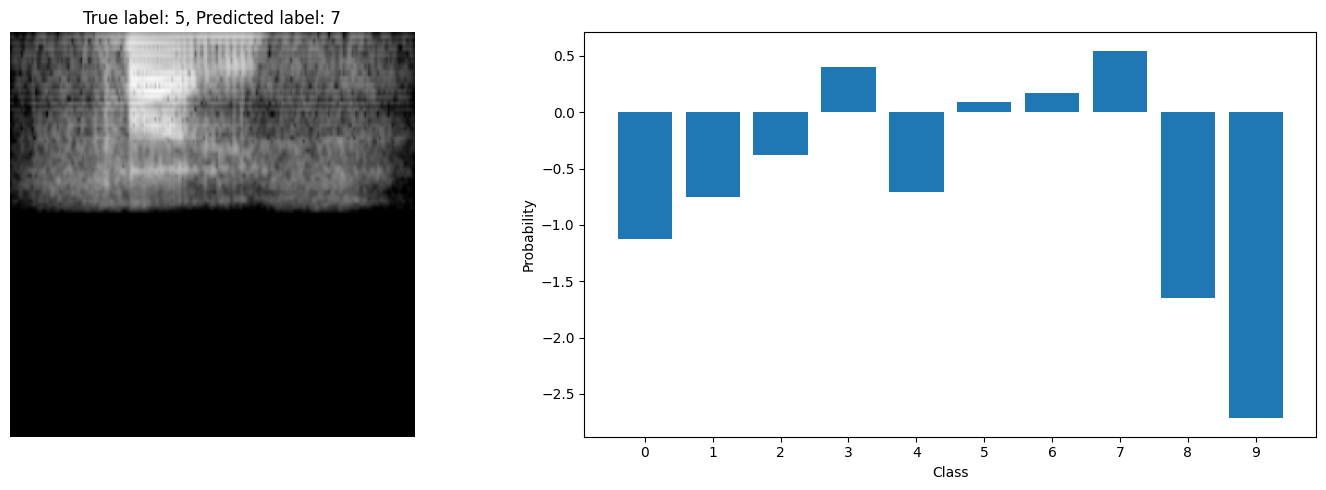

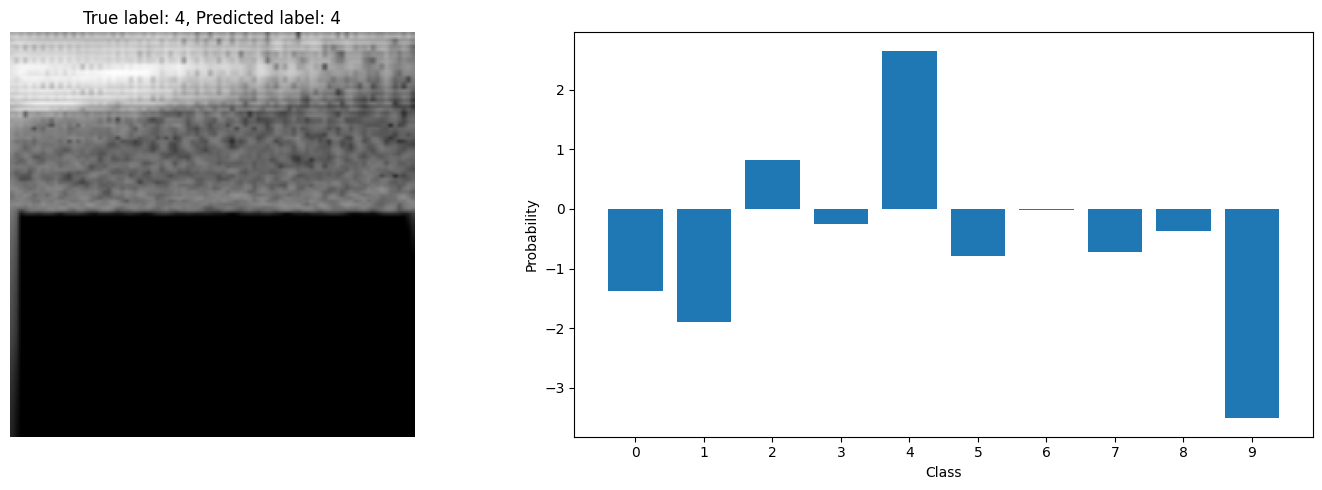

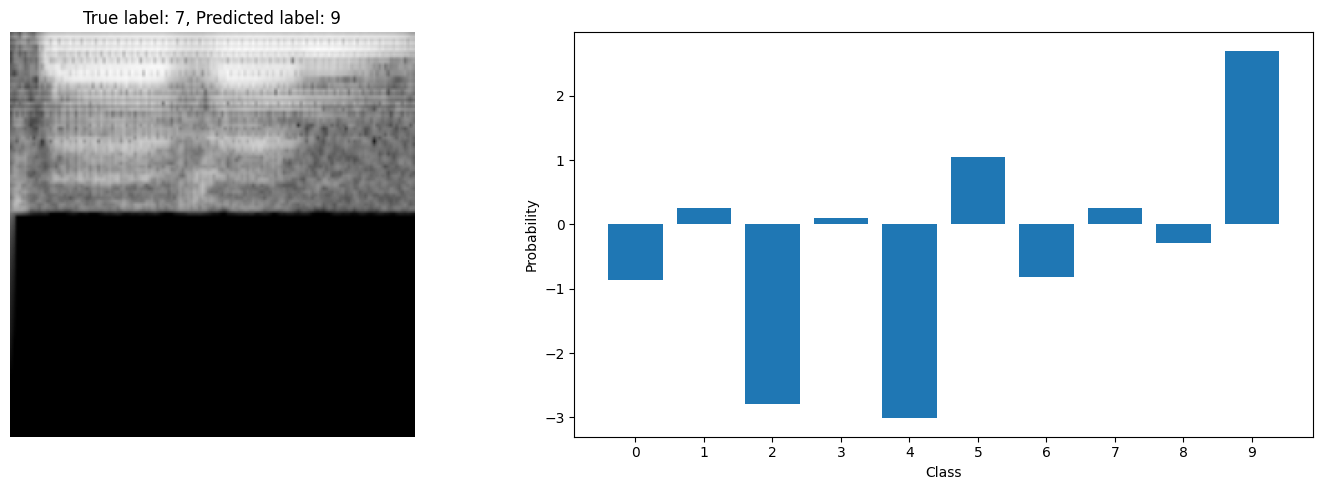

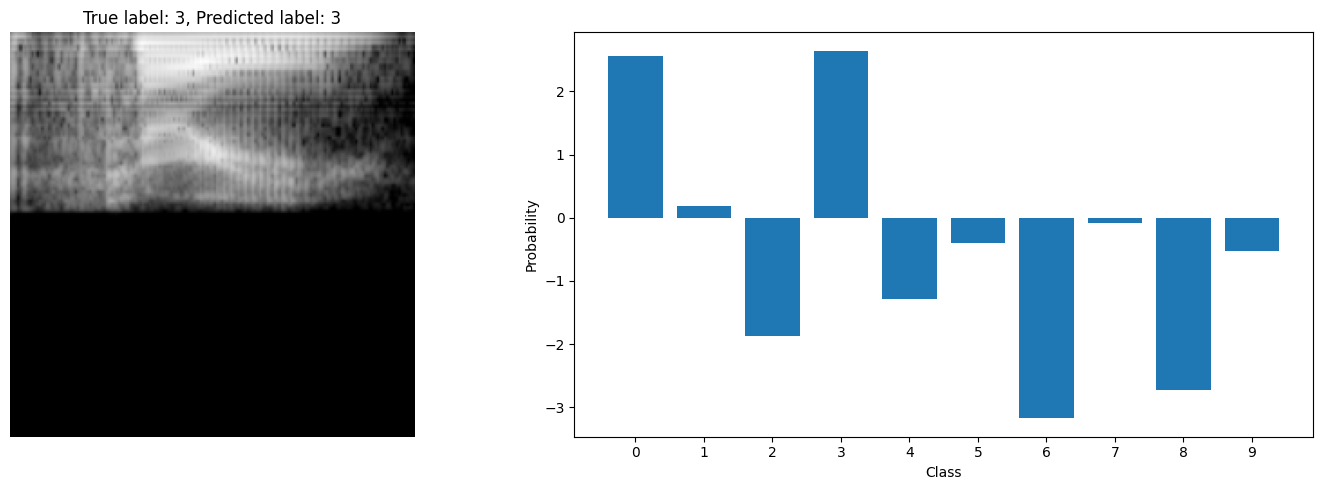

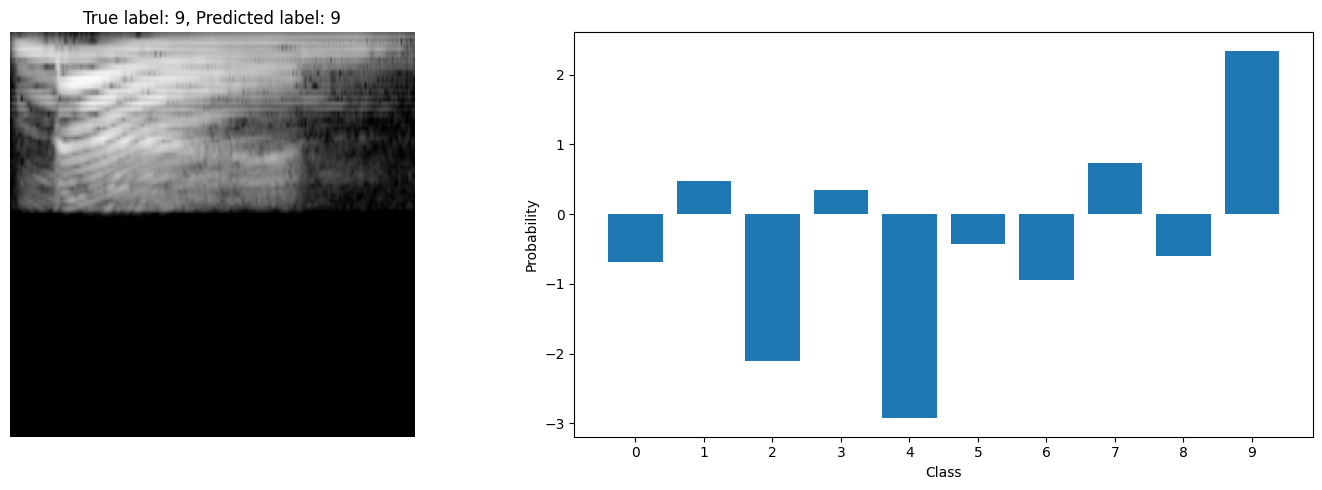

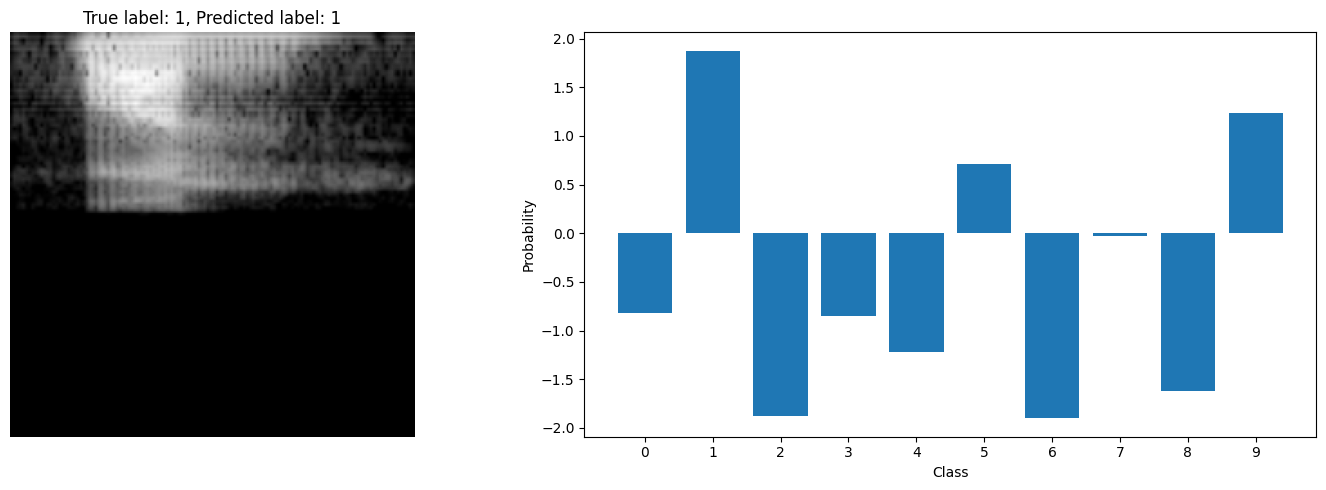

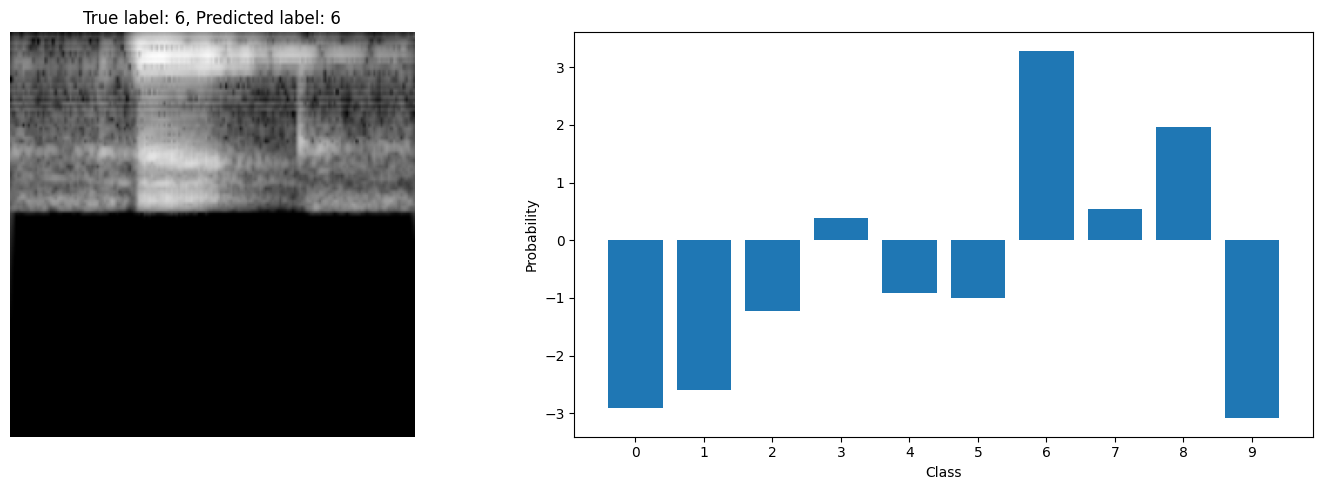

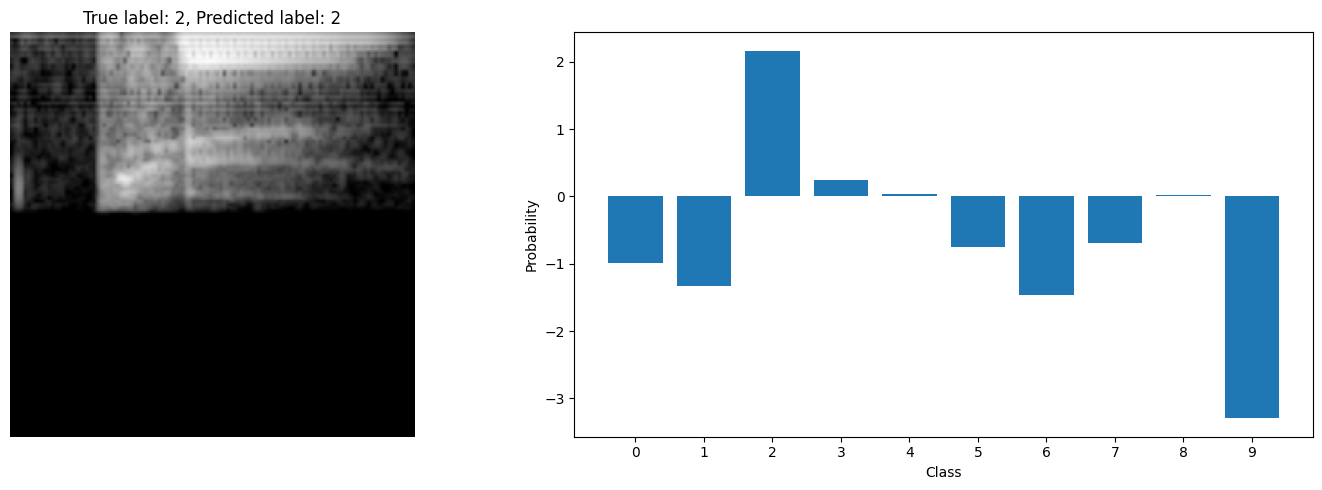

In [37]:
def show_predictions(model, test_dataset, num_images_per_class):
    model.eval()

    # Initialize a dictionary to store the indices of the first occurrence of each class
    class_indices = {}

    # Iterate over the test dataset to find the first occurrence of each class
    for index, (_, label) in enumerate(test_dataset):
        if label not in class_indices:
            class_indices[label] = index

    # Iterate over the class indices and display the specified number of images for each class
    for label, index in class_indices.items():
        for i in range(num_images_per_class):
            if i == 0:
                input_image, _ = test_dataset[index]
            else:
                input_image, _ = test_dataset[index + i]

            with torch.no_grad():
                input_image = input_image.to(device)

                output = model(input_image.unsqueeze(0))
                _, predicted = torch.max(output, 1)
                predicted_label = predicted.item()

            image = input_image.squeeze().cpu().numpy()

            fig, axs = plt.subplots(1, 2, figsize=(15, 5))
            if len(image.shape) == 3:
                sample_image = np.transpose(image, (1, 2, 0))
            elif len(image.shape) == 2:
                sample_image = image

            axs[0].imshow(sample_image,
                          cmap='gray',
                          vmin=0, vmax=1)
            axs[0].set_title("True label: {}, Predicted label: {}".format(label, predicted_label))
            axs[0].axis('off')

            probability = output.cpu()[0].detach().numpy()

            classes = ['0', '1', '2', '3', '4',
                     '5', '6', '7', '8', '9']

            axs[1].bar(classes, probability)
            axs[1].set_xlabel('Class')
            axs[1].set_ylabel('Probability')

            # Rotate the x-axis labels vertically
            #axs[1].tick_params(axis='x', rotation=90)

            plt.tight_layout()
            plt.show()

# Call the function to show predictions
num_images_per_class = 1  # Specify the number of images per class
show_predictions(model, test_dataset, num_images_per_class)